In [300]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [222]:
df = pd.read_csv('laptop_data.csv', index_col=0)

In [223]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [224]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [225]:
df.duplicated().sum()

29

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [227]:
catvars = df.select_dtypes(include=['object']).columns
numvars = [i for i in df.columns.values if i not in catvars]

In [228]:
def uniquevals(col):
    print(f'Details of the column "{col}" are: {df[col].unique()}')

def valuecounts(col):
    print(f'Value counts of the column "{col}" are: {df[col].value_counts()}')
    
for col in df.columns.values:
    uniquevals(col)
    print('--'*75)

Details of the column "Company" are: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
------------------------------------------------------------------------------------------------------------------------------------------------------
Details of the column "TypeName" are: ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
------------------------------------------------------------------------------------------------------------------------------------------------------
Details of the column "Inches" are: [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
------------------------------------------------------------------------------------------------------------------------------------------------------
Details of the column "ScreenResolution" are: ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full H

In [229]:
# Coverting column "Ram" and "Weight" to numeric type
df['Ram'] = df['Ram'].str.replace('GB', '').astype('int32')
df['Weight'] = df['Weight'].str.replace('kg', '').astype('float32')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


# EDA

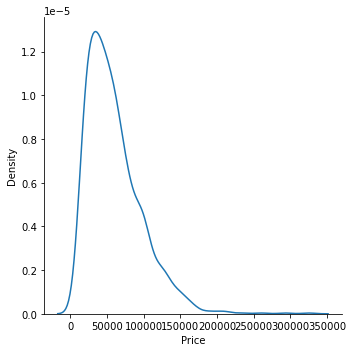

In [230]:
sns.displot(df['Price'], kind='kde')

C:\Users\Asus\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

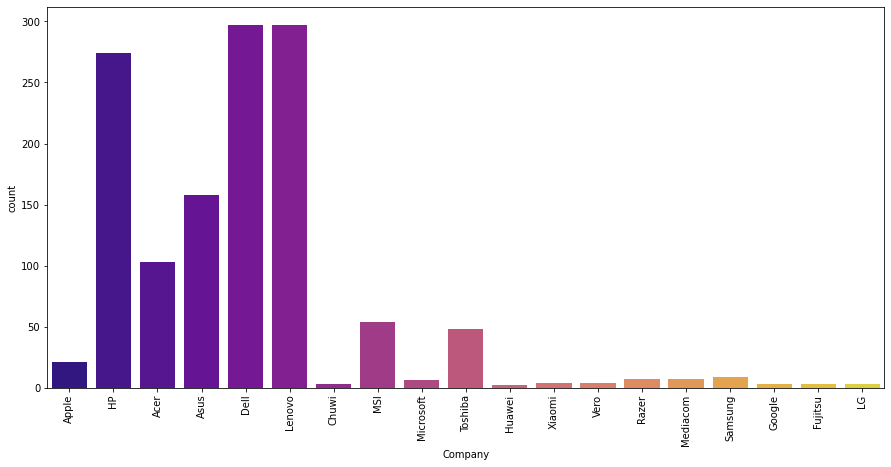

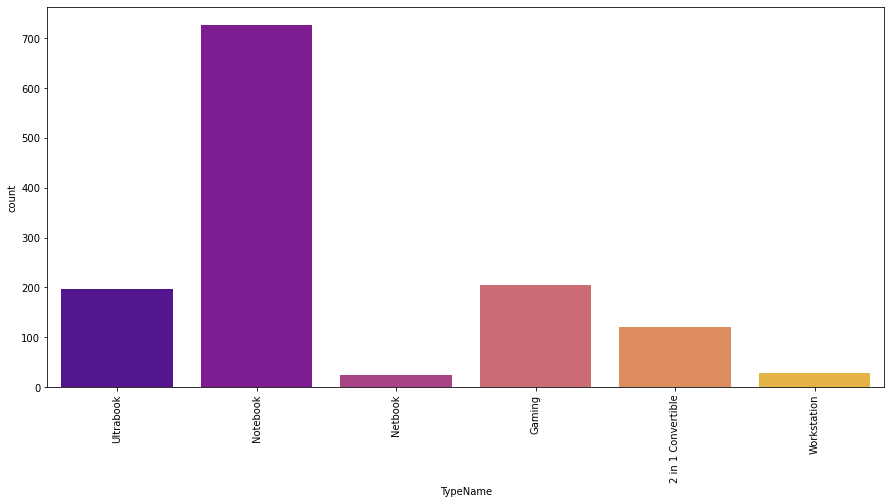

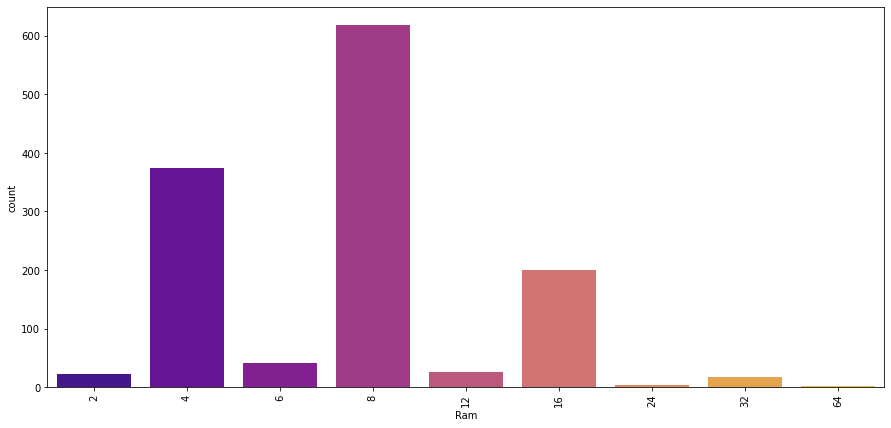

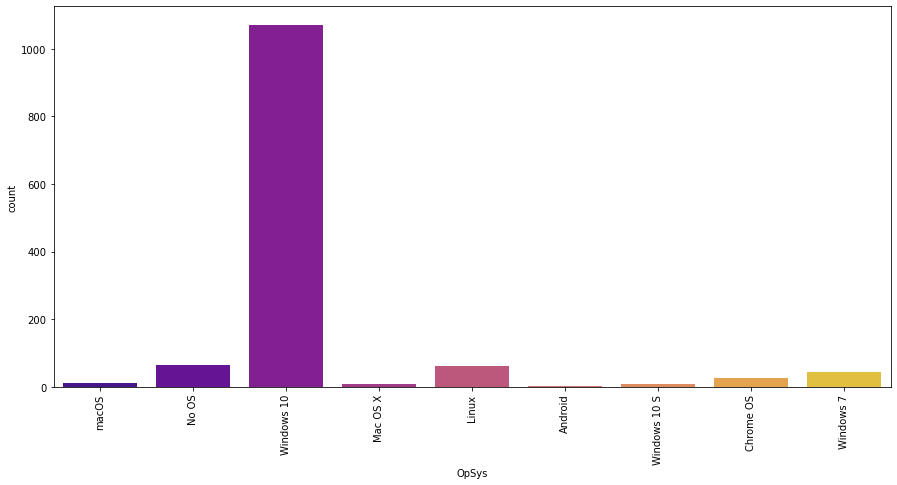

In [231]:
def plotter(col):
    plt.figure(figsize=(15, 7))
    sns.countplot(df[col], palette='plasma')
    plt.xticks(rotation='vertical')

col_list = ['Company', 'TypeName', 'Ram', 'OpSys']
for col in col_list:
    plotter(col)

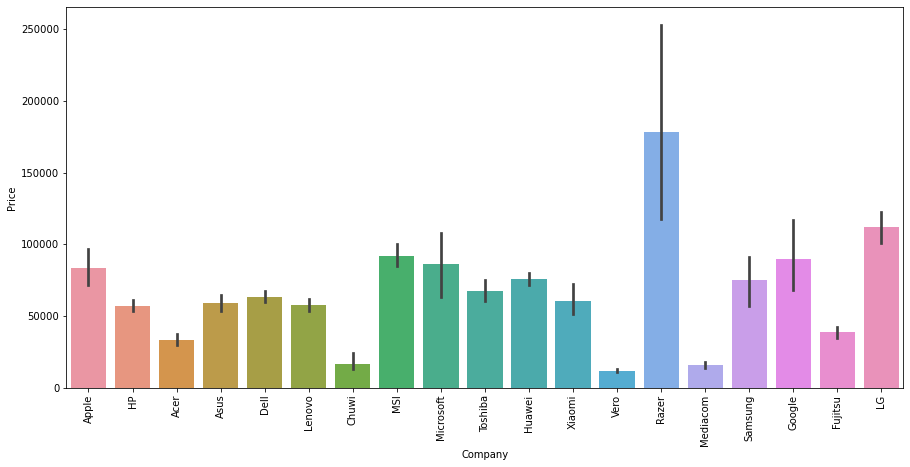

In [232]:
plt.figure(figsize=(15, 7))
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Asus\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


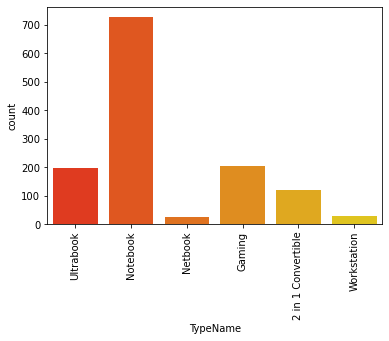

In [233]:
sns.countplot(df['TypeName'], palette='autumn')
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Asus\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


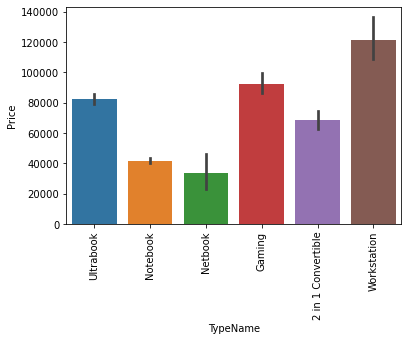

In [234]:
sns.barplot(df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Asus\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inches', ylabel='Price'>

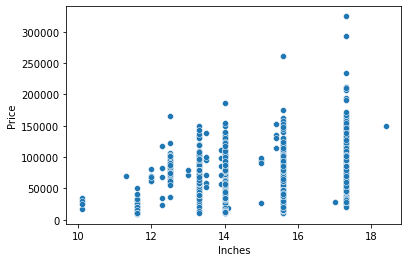

In [235]:
sns.scatterplot(df['Inches'], df['Price'])

# Processing other columns

### Splitting the "ScreenResolution" column

In [236]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [237]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


C:\Users\Asus\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Touchscreen', ylabel='count'>

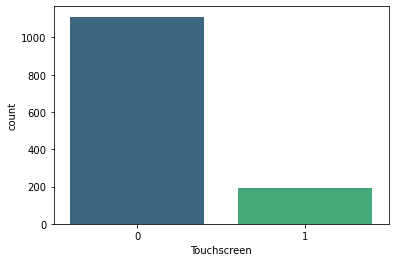

In [238]:
sns.countplot(df['Touchscreen'], palette='viridis')

C:\Users\Asus\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

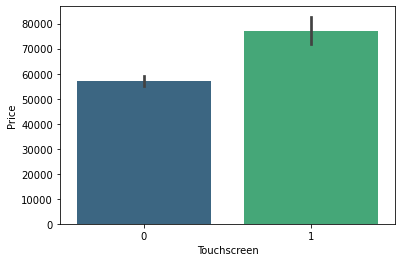

In [239]:
sns.barplot(df['Touchscreen'], df['Price'], palette='viridis')

In [240]:
df['IPS'] = df['ScreenResolution'].apply(lambda element:1 if 'IPS' in element else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


C:\Users\Asus\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IPS', ylabel='count'>

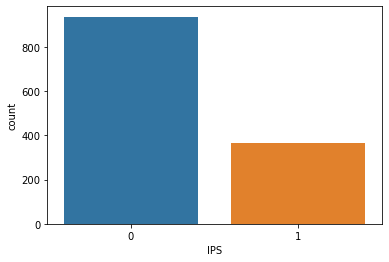

In [241]:
sns.countplot(df['IPS'])

C:\Users\Asus\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IPS', ylabel='Price'>

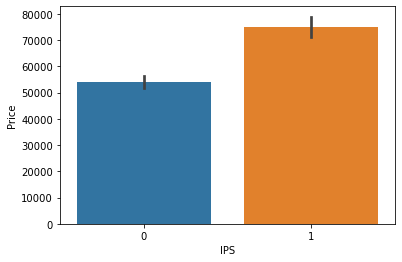

In [242]:
sns.barplot(df['IPS'], df['Price'])

In [243]:
split_df = df['ScreenResolution'].str.split('x', n=1, expand=True)
split_df.head(1)

,0,1
0,IPS Panel Retina Display 2560,1600


In [244]:
split_df.rename(columns={0:'X', 1:'Y_res',}, inplace=True)

In [245]:
split_df['X_res'] = split_df['X'].apply(lambda x: x.split(' ')[-1])
split_df['Y_res'] = split_df['Y_res'].astype(np.int32)
split_df['X_res'] = split_df['X_res'].astype(np.int32)

In [246]:
df = df.join(split_df)

<AxesSubplot:>

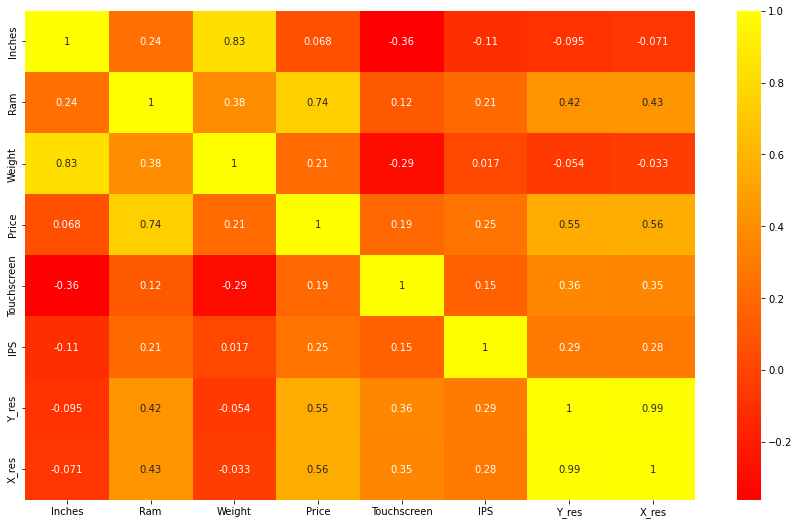

In [247]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, cmap='autumn')

In [248]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
Y_res          0.552809
X_res          0.556529
Name: Price, dtype: float64

### Ram, X_res, Y_res are highly correlated with price(dependent var)

### Problem is, both X_res and Y_res are also highly correlated with each other. For this problem, we can convert them into pixels.
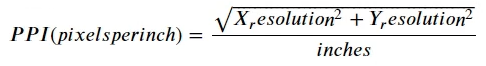

In [250]:
df['PPI'] = ((df['X_res']**2 + df['Y_res']**2))**0.5/df['Inches'].astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X,Y_res,X_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600,2560,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,1440,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080,1920,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800,2880,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600,2560,226.983005


In [251]:
## Dropping follwing columns as we are done with them
df.drop(['ScreenResolution', 'X_res', 'Y_res', 'Inches', 'X'], axis=1, inplace=True)

In [252]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [253]:
df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
PPI            0.473487
Name: Price, dtype: float64

### CPU column

In [254]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [255]:
df['CPU_name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[:3]))

In [256]:
df['CPU_name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'Intel Atom x5-Z8350',
       'AMD E-Series E2-9000e', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220', 'Intel Celeron Dual',
       'AMD Ryzen 1700', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'AMD FX 9830P', 'AMD E-Series 6110', 'Intel Xeon E3-1505M',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-9220', 'AMD A10-Series 9600P',
       'AMD A8-Series 7410', 'AMD A12-Series 9720P', 'Intel Celeron Quad',
       'AMD Ryzen 1600', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Samsung Cortex A72&A53',
       'AMD E-Series 9000', 'AMD A9-Series 9410'], dtype=object)

In [257]:
# Due to large no. of classes, we will convert everything except Intel(i3, i5, i7) to "AMD" and "Others"
def processortype(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

df['CPU_name'] = df['CPU_name'].apply(lambda text: processortype(text))

C:\Users\Asus\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


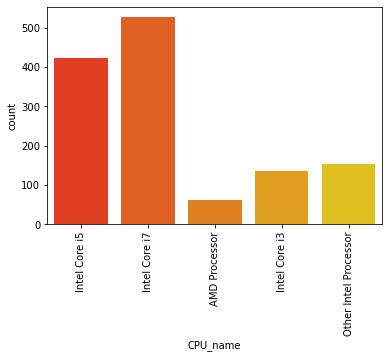

In [258]:
sns.countplot(df['CPU_name'], palette='autumn')
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Asus\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


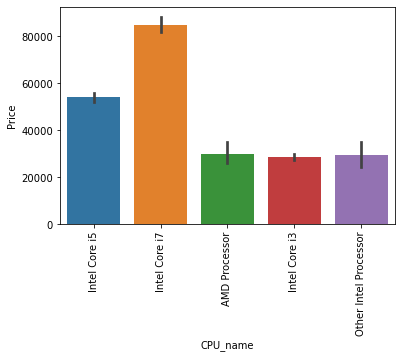

In [259]:
sns.barplot(df['CPU_name'], df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [260]:
df.drop('Cpu', axis=1, inplace=True)

### Ram column

C:\Users\Asus\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ram', ylabel='count'>

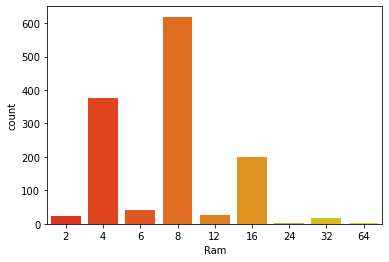

In [261]:
sns.countplot(df['Ram'], palette='autumn')

C:\Users\Asus\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ram', ylabel='Price'>

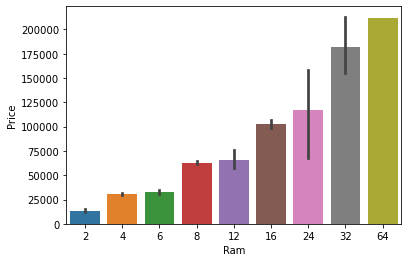

In [262]:
sns.barplot(df['Ram'], df['Price'])

### Memory Column

In [263]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '')
newdf = df['Memory'].str.split('+', n=1, expand=True)
newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1 HDD,None


In [264]:
df['First'] = newdf[0]
df['First'] = df['First'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,First
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [265]:
def applychanges(value):
    df['Layer1_'+value] = df['First'].apply(lambda x:1 if value in x else 0)

list_to_apply = ['HDD', 'SSD', 'Hybrid', 'Flash Storage']
for value in list_to_apply:
    applychanges(value)

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,First,Layer1_HDD,Layer1_SSD,Layer1_Hybrid,Layer1_Flash Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [266]:
df['First'] = df['First'].str.replace(r'\D', '')
df['First'].value_counts()

C:\Users\Asus\AppData\Local\Temp\ipykernel_13412\2920496641.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['First'] = df['First'].str.replace(r'\D', '')


256    508
1      240
128    177
512    140
500    132
32      45
64      17
2       16
10      10
16      10
180      5
240      1
8        1
508      1
Name: First, dtype: int64

In [267]:
df['Second'] = newdf[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,First,Layer1_HDD,Layer1_SSD,Layer1_Hybrid,Layer1_Flash Storage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,1,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [268]:
def applychanges1(value):
    df['Layer2_'+value] = df['Second'].apply(lambda x:1 if value in x else 0)

list_to_apply1 = ['HDD', 'SSD', 'Hybrid', 'Flash Storage']
df['Second'] = df['Second'].fillna('0')
for value in list_to_apply1:
    applychanges1(value)


df['Second'] = df['Second'].str.replace(r'\D', '')
df['Second'].value_counts()

C:\Users\Asus\AppData\Local\Temp\ipykernel_13412\1271213254.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Second'] = df['Second'].str.replace(r'\D', '')


0      1095
1       185
2        15
256       3
500       2
10        2
512       1
Name: Second, dtype: int64

In [269]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,First,Layer1_HDD,Layer1_SSD,Layer1_Hybrid,Layer1_Flash Storage,Second,Layer2_HDD,Layer2_SSD,Layer2_Hybrid,Layer2_Flash Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,1,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [270]:
df['HDD'] = (df['First']*df['Layer1_HDD']+df['Second']*df['Layer2_HDD'])
df['SSD'] = (df['First']*df['Layer1_SSD']+df['Second']*df['Layer2_SSD'])
df['Hybrid'] = (df['First']*df['Layer1_Hybrid']+df['Second']*df['Layer2_Hybrid'])
df['Flash_Storage'] = (df['First']*df['Layer1_Flash Storage']+df['Second']*df['Layer2_Flash Storage'])

df.drop(columns=['First', 'Second', 'Layer1_HDD', 'Layer1_SSD', 'Layer1_Hybrid', 'Layer1_Flash Storage', 'Layer2_HDD', 'Layer2_SSD', 'Layer2_Hybrid', 'Layer2_Flash Storage'], inplace=True)

In [272]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,,128,,
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,,,,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,,256,,
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,,512,,
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,,256,,


In [273]:
for i in ['HDD', 'SSD', 'Hybrid', 'Flash_Storage']:
    df[i] = df[i].apply(lambda x:0 if x == "" else x)

In [274]:
df.drop('Memory', axis=1, inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [277]:
for i in ['HDD', 'SSD', 'Hybrid', 'Flash_Storage']:
    df[i] = df[i].astype(int)

In [278]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.234971
SSD              0.029700
Hybrid          -0.004244
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [279]:
# Hybrid and Flash_Storage columns do not provide much insight relative to price as seen from their correlation,
# so better to remove them.
df.drop(['Hybrid', 'Flash_Storage'], axis=1, inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


## GPU column

In [285]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.drop('Gpu', axis=1, inplace=True)

<AxesSubplot:xlabel='Gpu_brand', ylabel='count'>

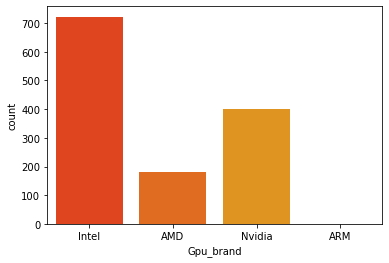

In [289]:
sns.countplot(df['Gpu_brand'], palette='autumn')

<AxesSubplot:xlabel='Gpu_brand', ylabel='Price'>

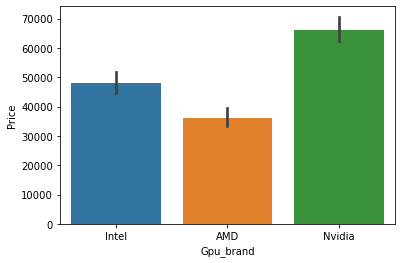

In [296]:
#There is only one row which has ARM as GPU. So, better to drop it off.
df = df[df['Gpu_brand']!='ARM']
sns.barplot(df['Gpu_brand'], df['Price'], estimator=np.median)

## Operating System Analysis

In [297]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

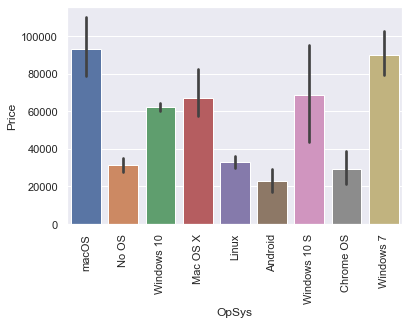

In [301]:
sns.barplot(df['OpSys'], df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [302]:
def set_category(text):
    if "Windows" in text:
        return "Windows"
    elif "mac" in text.lower():
        return "Mac"
    else:
        return "Other"
    
df['OpSys'] = df['OpSys'].apply(set_category)

In [304]:
df['OpSys'].uniqueque()

array(['Mac', 'Other', 'Windows'], dtype=object)

<AxesSubplot:xlabel='OpSys', ylabel='count'>

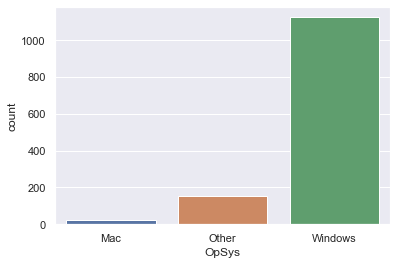

In [311]:
sns.countplot(df['OpSys'])

(array([0, 1, 2]),
 [Text(0, 0, 'Mac'), Text(1, 0, 'Other'), Text(2, 0, 'Windows')])

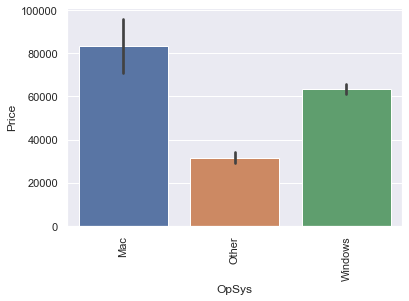

In [312]:
sns.barplot(df['OpSys'], df['Price'])
plt.xticks(rotation='vertical')

## Weight Analysis

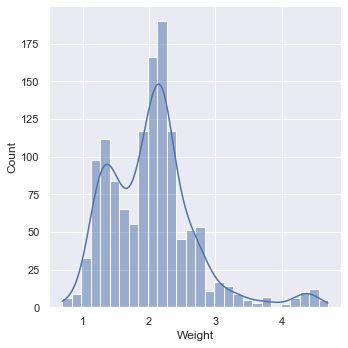

In [314]:
sns.displot(df['Weight'], kde=True)

<AxesSubplot:xlabel='Weight', ylabel='Price'>

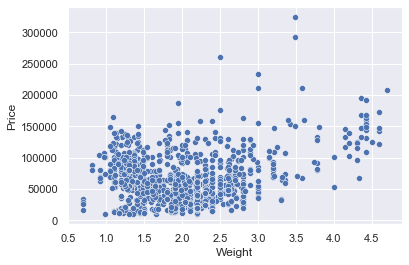

In [315]:
sns.scatterplot(df['Weight'], df['Price'])

## Price Analysis

<AxesSubplot:xlabel='Price', ylabel='Density'>

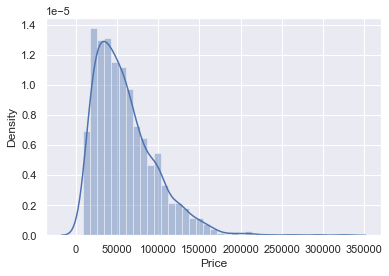

In [316]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

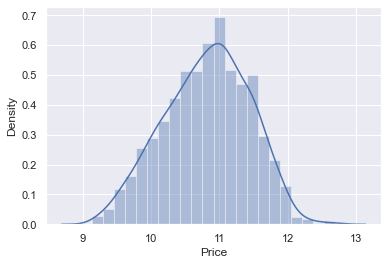

In [327]:
#It is a right skewed distribution. Let's apply logarithmic transformation to this column
sns.distplot(np.log(df['Price']))

In [328]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.235196
SSD            0.029675
Name: Price, dtype: float64

<AxesSubplot:>

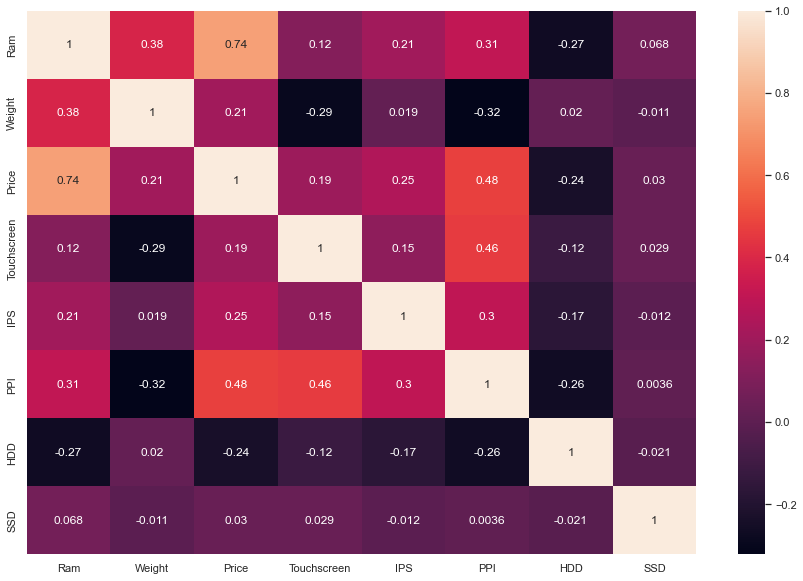

In [329]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

# Model Building

In [330]:
x = df.drop('Price', axis=1)
y = np.log(df['Price'])

In [332]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

In [340]:
mapper = {i:[value, df[value].dtype] for i, value in enumerate(X_train.columns)}
mapper

{0: ['Company', dtype('O')],
 1: ['TypeName', dtype('O')],
 2: ['Ram', dtype('int32')],
 3: ['OpSys', dtype('O')],
 4: ['Weight', dtype('float32')],
 5: ['Touchscreen', dtype('int64')],
 6: ['IPS', dtype('int64')],
 7: ['PPI', dtype('float64')],
 8: ['CPU_name', dtype('O')],
 9: ['HDD', dtype('int32')],
 10: ['SSD', dtype('int32')],
 11: ['Gpu_brand', dtype('O')]}

## Using Linear Regression

In [346]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

transformer = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 3, 8, 11])], remainder='passthrough')

lin_reg = LinearRegression()

pipe = Pipeline([('step1', transformer), ('step2', lin_reg)])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 score: ", r2_score(y_test, y_pred))
print("MAE: \t  ", mean_absolute_error(y_test, y_pred))

R2 score:  0.8019203008460523
MAE: 	   0.21673509857226833


## Using Ridge Regression

In [354]:
from sklearn.linear_model import Ridge

transformer = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 3, 8, 11])], remainder='passthrough')

ridge_reg = Ridge(alpha=10)

pipe = Pipeline([('step1', transformer), ('step2', ridge_reg)])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 score: ", r2_score(y_test, y_pred))
print("MAE: \t  ", mean_absolute_error(y_test, y_pred))

R2 score:  0.8061032930232287
MAE: 	   0.21482279348032002


## Using Lasso Regression

In [355]:
 from sklearn.linear_model import Lasso

transformer = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 3, 8, 11])], remainder='passthrough')

lasso_reg = Lasso(alpha=0.001)

pipe = Pipeline([('step1', transformer), ('step2', lasso_reg)])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 score: ", r2_score(y_test, y_pred))
print("MAE: \t  ", mean_absolute_error(y_test, y_pred))

R2 score:  0.8018759577443911
MAE: 	   0.21728761770086585


## Using Decision Tree

In [360]:
from sklearn.tree import DecisionTreeRegressor

transformer = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 3, 8, 11])], remainder='passthrough')

ensemble_model = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([('step1', transformer), ('step2', ensemble_model)])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 score: ", r2_score(y_test, y_pred))
print("MAE: \t  ", mean_absolute_error(y_test, y_pred))

R2 score:  0.8483782923709208
MAE: 	   0.18058005917899023


## Using Random Forests

In [363]:
from sklearn.ensemble import RandomForestRegressor

transformer = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 3, 8, 11])], remainder='passthrough')

ensemble_model = RandomForestRegressor(n_estimators=100,
                                       random_state=3,
                                       max_samples=0.5,
                                       max_features=0.75,
                                       max_depth=15)

pipe = Pipeline([('step1', transformer), ('step2', ensemble_model)])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 score: ", r2_score(y_test, y_pred))
print("MAE: \t  ", mean_absolute_error(y_test, y_pred))

R2 score:  0.8793230124378477
MAE: 	   0.16235969328550506


## Pickling the RandomForestRegressor Algo

In [364]:
import pickle
pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [368]:
x.to_csv('traineddata.csv', index=None)

## Hyperparameter Tuning

In [370]:
index_list = [0, 1, 3, 8, 11]
transform_list = []
for key,value in mapper.items():
    if key in index_list:
        transform_list.append(value[0])
        
transform_list

['Company', 'TypeName', 'OpSys', 'CPU_name', 'Gpu_brand']

In [372]:
x = pd.get_dummies(x, columns=transform_list, drop_first=True)
x.head()

,Ram,Weight,Touchscreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [375]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

X_train.shape, X_test.shape

((1106, 38), (196, 38))

In [376]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [377]:
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [379]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

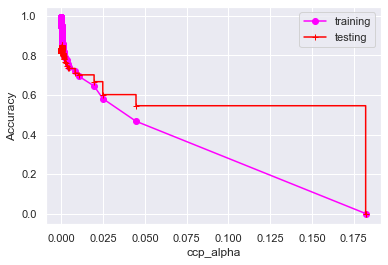

In [380]:
train_score = [reg.score(X_train, y_train) for reg in alphalist]
test_score = [reg.score(X_test, y_test) for reg in alphalist]

plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas, train_score, marker='o', label='training', color='magenta')
plt.plot(ccp_alphas, test_score, marker='+', label='testing', color='red', drawstyle='steps-post')

plt.legend()
plt.show()

#### Possible alpha values can lie between 0.0025 -> 0.0075

[Text(0.5, 0.9, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(0.25, 0.7, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(0.125, 0.5, 'squared_error = 0.13\nsamples = 256\nvalue = 10.387'),
 Text(0.375, 0.5, 'squared_error = 0.084\nsamples = 106\nvalue = 9.781'),
 Text(0.75, 0.7, 'Ram <= 14.0\nsquared_error = 0.215\nsamples = 744\nvalue = 11.119'),
 Text(0.625, 0.5, 'TypeName_Notebook <= 0.5\nsquared_error = 0.159\nsamples = 553\nvalue = 10.967'),
 Text(0.5, 0.3, 'squared_error = 0.107\nsamples = 268\nvalue = 11.172'),
 Text(0.75, 0.3, 'PPI <= 114.881\nsquared_error = 0.131\nsamples = 285\nvalue = 10.775'),
 Text(0.625, 0.1, 'squared_error = 0.072\nsamples = 59\nvalue = 10.384'),
 Text(0.875, 0.1, 'squared_error = 0.096\nsamples = 226\nvalue = 10.877'),
 Text(0.875, 0.5, 'squared_error = 0.12\nsamples = 191\nvalue = 11.558')]

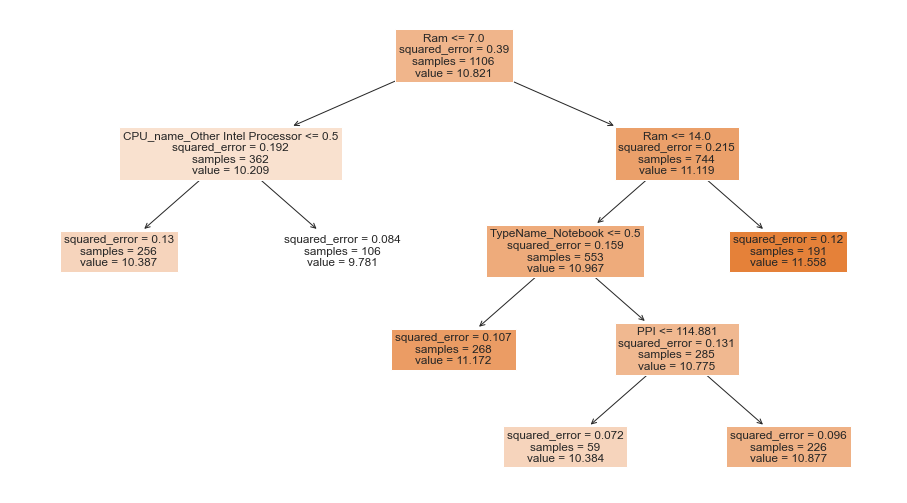

In [383]:
from sklearn.tree import plot_tree
reg = DecisionTreeRegressor(random_state=0, ccp_alpha=0.0085)
reg.fit(X_train, y_train)
plt.figure(figsize=(16, 9))
plot_tree(reg, filled=True, feature_names=x.columns)

In [384]:
params = {
    'RandomForest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100, 1200, 10)],
            'criterion':['mse', 'mae'],
            'max_depth':[int(x) for x in np.linspace(1, 30, 5)],
            'max_features':['auto', 'sqrt', 'log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025, 0.0125, 5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14]
        }
    },
    'DecisionTree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':['mse', 'mae'],
            'max_depth':[int(x) for x in np.linspace(1, 30, 5)],
            'max_features':['auto', 'sqrt', 'log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025, 0.0125, 5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14]
        }
    }
}

In [385]:
from sklearn.model_selection import RandomizedSearchCV
scores = []
for modelname, mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'],
                            cv=5,
                            n_iter=10,
                            scoring='neg_mean_squared_error',
                            verbose=2)
    clf.fit(X_train, y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=588; total time=  28.1s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=588; total time=  34.8s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=588; total time=  27.6s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=588; total time=  27.5s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=588; total time=  28.0s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END ccp_alpha=0

[CV] END ccp_alpha=0.005, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_feat

In [386]:
scores_df = pd.DataFrame(scores, columns=['model_mane', 'best_score', 'best_estimator'])
scores_df

,model_mane,best_score,best_estimator
0,NaN,-0.083051,"(DecisionTreeRegressor(ccp_alpha=0.005, criter..."
1,NaN,-0.100692,"DecisionTreeRegressor(ccp_alpha=0.005, criteri..."


In [387]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.0830505518221621,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.005, criterion='mae', max_depth=30,
                        min_samples_leaf=5, min_samples_split=14,
                        n_estimators=588)},
 {'model_name': 'DecisionTree',
  'best_score': -0.10069221520171885,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.005, criterion='mae', max_depth=15,
                        max_features='auto', min_samples_leaf=14,
                        min_samples_split=10)}]

In [391]:
rf = RandomForestRegressor(ccp_alpha=0.005, criterion='mae', max_depth=30,
                        min_samples_leaf=5, min_samples_split=14,
                        n_estimators=588)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(r2_score(y_test, y_pred))

0.7806926647505461


In [407]:
#Best to use the previous RandomForestRegressor model as it has greater r2 score
rf = RandomForestRegressor(n_estimators=100,
                                       random_state=3,
                                       max_samples=0.5,
                                       max_features=0.75,
                                       max_depth=15)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(r2_score(y_test, y_pred))

0.8863349447916946


In [392]:
predicted = []
testtrain = np.array(x)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))

predicted

[array([11.25622278]),
 array([11.228906]),
 array([10.88554443]),
 array([11.53708858]),
 array([11.28362969]),
 array([10.23240528]),
 array([11.52403613]),
 array([11.228906]),
 array([11.51505407]),
 array([11.00054847]),
 array([10.35951034]),
 array([10.18654807]),
 array([11.53604378]),
 array([10.23898865]),
 array([11.28433442]),
 array([11.28362969]),
 array([10.89181902]),
 array([11.53708858]),
 array([10.77734084]),
 array([11.254665]),
 array([9.76013441]),
 array([10.95127211]),
 array([10.18079893]),
 array([10.99973666]),
 array([10.99462366]),
 array([10.21904467]),
 array([11.228906]),
 array([10.88713913]),
 array([10.99717642]),
 array([10.80776483]),
 array([9.77074109]),
 array([10.45093797]),
 array([10.25234926]),
 array([11.53708858]),
 array([11.228906]),
 array([9.77074109]),
 array([10.16873968]),
 array([10.88072118]),
 array([10.42062296]),
 array([10.88944963]),
 array([10.18784943]),
 array([11.50036893]),
 array([10.38907094]),
 array([10.41102966]),
 

In [395]:
pred_final = [np.exp(predicted[i][0]) for i in range(len(predicted))]
df['Predicted Price'] = np.array(pred_final)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_name,HDD,SSD,Gpu_brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,77359.818485
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,75275.199070
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,53398.847018
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,102445.741242
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,79509.333274


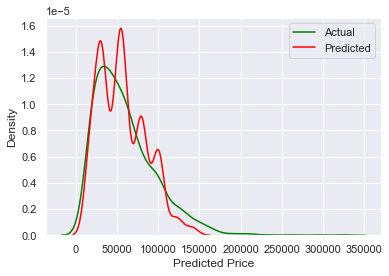

In [409]:
sns.distplot(df['Price'], hist=False, color='green', label='Actual')
sns.distplot(df['Predicted Price'], hist=False, color='red', label='Predicted')
plt.legend()
plt.show()

In [408]:
import pickle
file = open('laptoppricepredictor.pkl', 'wb')
pickle.dump(rf, file)
file.close()